<a href="https://colab.research.google.com/github/Ribeirotmr/Iniciacao-Cientifica/blob/main/C%C3%B3pia_de_IC_Qiskit_QAOA_MaxCut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QAOA para MaxCut

---
<center><img align = "center" src="https://drive.google.com/uc?export=view&id=1IC757TuhluqVqw0RF77pgtEaWyNDBHYb" alt="grafo" width="300"></center>


---
`Link:`

[Fassarella.net](https://fassarella.net)

---
Qiskit:
*   [Qiskit](https://docs.quantum.ibm.com/api/qiskit)
*   [Qiskit Circuit Library](https://docs.quantum.ibm.com/api/qiskit/circuit_library)
*   [Qiskit Gates Tutorial](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits/3_summary_of_quantum_operations.ipynb)
*   [List of Quantum Logic Gates](https://en.wikipedia.org/wiki/List_of_quantum_logic_gates)
---

Python:
*   [LearningPython](https://https://www.learnpython.org/)
*   [W3Schools](https://www.w3schools.com/python/)


# QAOA para o MaxCut

## Introdução

>   **Definição do problema MaxCut**: "Dado um grafo G = (V,E) não direcionado onde cada aresta de E é ponderada com um número inteiro, o problema de corte máximo (Max-Cut) consistem em particionar os vértices de V em dois subconjuntos disjuntos de modo a maximizar o peso total das arestas entre os dois subconjuntos." (Benlic & Jin-Kao, 2013. Tradução nossa.)

**Referências**:
*   [https://en.wikipedia.org/wiki/Quantum_optimization_algorithms](https://en.wikipedia.org/wiki/Quantum_optimization_algorithms)
*   [https://arxiv.org/abs/quant-ph/9607014](https://arxiv.org/abs/quant-ph/9607014)
*   [https://arxiv.org/html/2408.00557v1#bib.bib4](https://arxiv.org/html/2408.00557v1)
*   [https://github.com/OpenQuantumComputing/QAOA](https://github.com/OpenQuantumComputing/QAOA)
*   [https://nvidia.github.io/cuda-quantum/0.8.0/using/examples/qaoa.html](https://nvidia.github.io/cuda-quantum/0.8.0/using/examples/qaoa.html)
*   [https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm](https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm)
*   [Hidary2021](https://drive.google.com/file/d/1J8Nv8ufZ13RcRFVveyyzfODukO-eWYDV/view?usp=drive_link)] Jack D. Hidary: *Quantum Computing: An Applied Approach* - 2nd. edition.  Springer, 2021: pp.156-159.
*   Una Benlic, Jin-Kao (2013): *Breakout Local Search for the Max-Cut problem*. Engineering Applications of Artificial Intelligence
Volume 26, Issue 3, March 2013, Pages 1162-1173. [Doi: 10.1016/j.engappai.2012.09.001](https://www.sciencedirect.com/science/article/abs/pii/S0952197612002175). <font color="green"><-- Abordagem clássica<font>


*Técnicas de Otimização*:

*   Hey Amit: *COBYLA Algorithm Explained*. [https://medium.com/@heyamit10/cobyla-algorithm-explained-6161e9b694e6](https://medium.com/@heyamit10/cobyla-algorithm-explained-6161e9b694e6).
*   [https://docs.quantum.ibm.com/api/qiskit/0.27/qiskit.algorithms.optimizers.COBYLA](https://docs.quantum.ibm.com/api/qiskit/0.27/qiskit.algorithms.optimizers.COBYLA)
*   [https://journals.aps.org/pra/abstract/10.1103/PhysRevA.99.032331](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.99.032331) <font color = "magenta">**<-- Cálculo analítico de gradientes de valores esperados!!!**<font>

*Aplicações*:

*   Jack S. Baker, Santosh Kumar Radha: *Wasserstein Solution Quality and the Quantum Approximate Optimization Algorithm: A Portfolio Optimization Case Study*. [arXiv:2202.06782](https://arxiv.org/abs/2202.06782).
*   Alberto B.de Palhares Júnior: *QAOA Applied to the Portfolio
Optimization Problem*. Dissertação de Mestrado (UFRN). [https://repositorio.ufrn.br/bitstream/123456789/54372/1/QAOAappliedportfolio_PalharesJunior_2023.pdf](https://repositorio.ufrn.br/bitstream/123456789/54372/1/QAOAappliedportfolio_PalharesJunior_2023.pdf).

---
---

**MaxCut e sua Quantização**

Considere um grafo não-orientado com pesos
$$
\mathcal{G} = (V,E,W),
$$
com conjunto de vértices ($n_V \in \mathbb{N}$ é o número de vértices)
$$
V = \left\{ i;\ i = 0, \dots, n_V-1 \right\},
$$
conjunto de arestas
$$
E \subset V \times V,
$$
e conjunto de pesos
$$
W = \left\{ w_{ij} \in \mathbb{R};\ i,j \in V\right\},
$$
sendo que
$$
w_{ij} = 0,\ \forall i,j \in V\ /\ (i,j) \notin E.
$$

>   **Problema MaxCut**: o problema MaxCut para o grafo $\mathcal{G}$ consiste em determinar uma partição do conjunto de vértices $V$ em dois subconjuntos, digamos $V_0$ e $V_1$, de modo a maximizar a soma dos pesos associados a arestas que têm um vértice em $V_0$ e outro vértice em $V_1$.


Para exprimir matematicamente o problema, começamos verificando que cada partição $\left\{ V_0, V_1\right\}$ do conjunto de vértices $V$ está biunivocamente associadada a um vetor binário indexado pelos vértices de $V$:
$$
\left\{ V_0, V_1\right\} \leftrightarrow \mathbf{z} = \left(z_i\right)_{i \in V} = (z_0, z_1, \dots, z_{n_V}) \in \left\{ 0, 1\right\}^{\times n_V},\
z_k = \left\lbrace
\begin{array}{ll}
0,& \text{se}\ v_k \in V_0;\\
1,& \text{se}\ v_k \in V_1.\\
\end{array}
\right.
$$

Assim, podemos exprimir matematicamente o problema MaxCut em termos da *função custo* associada:
$$
\text{MaxCut $(\mathcal{G})$}: \underset{\mathbf{z} \in \left\{ 0, +1\right\}^{\times n_V}}{\arg \max}  C(\mathbf{z}),
$$
onde
$$
C(\mathbf{z}) = \frac{1}{2}\sum_{i,j\in V} w_{ij}(1- (-1)^{z_i}(-1)^{z_j}).
$$

**Quantização**

Definimos um espaço de qubits associado ao problema e um hamiltoniano associado à função custo:
$$
\mathcal{H} = \mathcal{H}_1^{\otimes n_V} = \mathrm{spam}\left\{ |z_{n_V - 1}\dots z_1z_0 \rangle;\  z_0, z_1, \dots,  z_{n_V - 1} \in \left\{ 0,1\right\}\right\}
$$
e
$$
H_C = \frac{1}{2}\sum_{i,j \in V} w_{ij} (I - Z_iZ_j),
$$
onde $Z_k$s denota o operador de $\mathcal{H}$ que atua no $k$-ésimo qubit como a porta $Z$:
$$
Z_k |z_{n_V - 1}\dots z_1z_0 \rangle = (-1)^{j_k} |z_{n_V - 1}\dots z_1z_0  \rangle.
$$


*Observamos que $H_C$ é um operador diagonalizado na base computacional, com autovalores correspondendo às imagens da função custo:*
$$
H_C | z_{n_V - 1} \dots z_1 z_0 \rangle = C(\mathbf{z}) | z_{n_V - 1} \dots z_1 z_0 \rangle,\ \forall \mathbf{z} = (z_0, z_1, \dots z_{n_V - 1}) \in \left\{0,1 \right\}^{\times n_V}.
$$

<font color = red ><b>Resolver o MaxCut corresponde a determinar o autoestado correspondente ao maior autovalor de $H_C$<b><font>

◼


# QISKIT: Carregamento

In [ ]:
!pip install qiskit -U
!pip install qiskit_aer
!pip install qiskit-ibm-runtime

import qiskit
qiskit.__version__

'1.4.1'

In [ ]:
!pip install matplotlib
!pip install pylatexenc

In [ ]:
# Qiskit: métodos básicos

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import transpile

from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city

In [ ]:
# Acesso à IBM

from qiskit_ibm_runtime import QiskitRuntimeService

IBMToken_lucio = "4fa7c0ee5a33486dbe06bece5db9d98dbd6ec5b28a044f7b1c285183b5db982df087350de18e19e96f49c6727efb3f22d7d813a473664aeb2c3a9ff7bd2c13cc"
QiskitRuntimeService.save_account(
channel = 'ibm_quantum',
token = IBMToken_lucio,
overwrite=True
)

# Processadores disponíveis

service = QiskitRuntimeService()
print("Backends disponíveis:")
display(service.backends())

# Backend
service = QiskitRuntimeService(channel="ibm_quantum")

'''
Backend com menor número de jobs em execução
'''
backend = service.least_busy(operational=True, simulator=False)

'''
Backend personalizado
'''
#backend = service.backend(name="ibm_brisbane")

print("Backend:")
display(backend.name)

Backends disponíveis:


[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

Backend:


'ibm_sherbrooke'

# Algoritmo Quântico de Força Bruta


$$
\begin{split}
H_C | z \rangle &= C(z) | z \rangle
\leadsto
 \langle z | H_C| z \rangle = C(z)
\end{split}
$$

> O *Algoritmo Quântico de Força Bruta* consiste em calcular a média de $H_C$ em todos os estados da base computacional para descobrir qual estado corresponde ao valor esperado máximo -- e que corresponde à solução do problema MaxCut.
*   Vantagem: fácil de implementar;
*   Desvantagem: ineficiente, pois requer o número cálculos de valores esperados igual a $2^n$ (*i.e.*,cresce exponencialmente com o número de vértices do grafo).

---
---


## MaxCut 1

<img src="https://drive.google.com/uc?export=view&id=10pL2A_kb1FSdtVn4vBUsKjX7oifN9HEw" alt="drawing" width="300"/>

Parâmetros:

*   Número de vértices/qubits: 4;
*   Função custo:
$$
C(z_0,z_1,z_2,z_3) = \frac{1}{2}\sum_{k=1}^3(1 - z_0z_k);
$$
*   Hamiltoniano e operador do custo:
$$
\begin{split}
H_C &= \frac{1}{2}\sum_{k=1}^3(I - Z_0Z_k)\\
&= \frac{3}{2}  I - \frac{1}{2} Z_0Z_1 - \frac{1}{2}Z_0Z_2 - \frac{1}{2}Z_0Z_3.
\end{split}
$$

In [ ]:
'''
Circuito de n qubits que prepara o estado |z >, para 0 <= z <= 2**n -1.
'''

def CB(n,m):
    '''
    Circuito de n qubits que prepara o estado |z >, para 0 <= z <= 2**n -1

    Inputs:
        n (int) : número de qubits
            n >= 1
        m (int) : número inteiro do estado da base base computacional
            0 <= m <= 2**n-1
    '''

    if n < 1 or m < 0 or m > 2**n -1:
        return print(f"ERRO: as entradas devem ser inteiros, a primeira 'n' deve ser positiva e a segunda 'm' deve ser maior ou igual a '0' e menor ou igual a '2**n - 1'.")
    else:
        qc = QuantumCircuit(n)
        binario = bin(m)[2:]
        for k in range(len(binario)):
            if binario[k] == "1":
                qc.x(k)
        return qc

In [ ]:
'''
Simulação
'''

# Pacotes

import time
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2
from qiskit_aer.primitives import Estimator

estimator = Estimator()

'''
Algoritmo
'''

inicio = time.time() # t inicial

n = 4 # número de qubits
qubits = [k for k in range(n)]

# Hamiltoniano

HC = SparsePauliOp.from_sparse_list([("I", [0], 3/2),
 ("ZZ", [0,1], -1/2),
  ("ZZ", [0,2], -1/2),
   ("ZZ", [0,3], -1/2)], num_qubits = n)

# Inicialização

z = 0
cz = 0

for m in range(2**n):
    job = estimator.run(circuits = [CB(n,m)], observables = [HC]) # manda a lista de circuitos e respectivos observáveis para rodar
    expval = job.result().values[0]
    if expval > cz:
        cz = expval
        z = m
    else:
        pass

print(f"Índice do estado quântico que resolve o MaxCut = {z}. Representação binária: {format(z, '0' + str(n) + 'b')}")
print(f"Valor esperado do Hamiltoniano do estado quântico = {cz}")

Índice do estado quântico que resolve o MaxCut = 1. Representação binária: 0001
Valor esperado do Hamiltoniano do estado quântico = 3.0


## MaxCut 2

<img src="https://drive.google.com/uc?export=view&id=1wPvW1r461IP51mHPh84A2AjMc38y1WQF" alt="drawing" width="300"/>

Parâmetros:

*   Número de vértices/qubits: 4;
*   Função custo:
$$
C(z_0,z_1,z_2,z_3) = \frac{1}{2}\sum_{0 \le j < k \le 3}(1 - z_jz_k);
$$
*   Hamiltoniano e operador do custo:
$$
\begin{split}
H_C &= \frac{1}{2}\sum_{0\le j<k\le 3}(I - Z_jZ_k)\\
&= \frac{3}{2}I - \frac{1}{2} Z_0Z_1 - \frac{1}{2}Z_0Z_2 - \frac{1}{2}Z_0Z_3 - \frac{1}{2} Z_1Z_2 - \frac{1}{2} Z_1Z_3  - \frac{1}{2} Z_2Z_3  .
\end{split}
$$

In [ ]:
'''
Simulação Clássica
'''
# Pacotes

#import time
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import Pauli, SparsePauliOp
#from qiskit_ibm_runtime import EstimatorV2
from qiskit_aer.primitives import Estimator

estimator = Estimator()

'''
Algoritmo
'''

#inicio = time.time() # t inicial

n = 4 # número de qubits
qubits = [k for k in range(n)]

# Hamiltoniano

HC = SparsePauliOp.from_sparse_list([("I", [0], 3/2),
 ("ZZ", [0,1], -1/2),
  ("ZZ", [0,2], -1/2),
   ("ZZ", [0,3], -1/2),
   ("ZZ", [1,2], -1/2),
   ("ZZ", [1,3], -1/2),
   ("ZZ", [2,3], -1/2)
   ], num_qubits = n)

# Inicialização

z = 0
cz = 0

circuits = [CB(n,m) for m in range(2**n)] # Lista de circuitos
observables = (2**n)*[HC] # Lista de observáveis (2^n cópias de HC)
job = estimator.run(circuits = circuits, observables = observables) # manda a lista de circuitos e respectivos observáveis para rodar

for m in range(2**n):
    expval = job.result().values[m]
    if expval > cz:
        cz = expval
        z = m
    else:
        pass

print(f"Índice do estado quântico que resolve o MaxCut = {z}. Representação binária: {format(z, '0' + str(n) + 'b')}")
print(f"Valor esperado do Hamiltoniano do estado quântico = {cz}")

In [ ]:
'''
Algoritmo Quântico
'''
# Pacotes

import time
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

estimator = EstimatorV2(backend)

'''
Algoritmo
'''

inicio = time.time() # t inicial

n = 4 # número de qubits
qubits = [k for k in range(n)]

# Hamiltoniano

HC = SparsePauliOp.from_sparse_list([("I", [0], 3),
 ("ZZ", [0,1], -1/2),
  ("ZZ", [0,2], -1/2),
   ("ZZ", [0,3], -1/2),
   ("ZZ", [1,2], -1/2),
   ("ZZ", [1,3], -1/2),
   ("ZZ", [2,3], -1/2)
   ], num_qubits = n)

# PUB

# Circuitos
circuitos = [CB(n,m) for m in range(2**n)] # Lista de circuitos
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
circuitos_transpilados = [pass_manager.run(circuitos[m]) for m in range(2**n)]
#transpile(circuitos[m], backend = backend) for m in range(2**n)] # Transpilação dos circuitos

observaveis = [HC for m in range(2**n)] # Lista de observáveis (2^n cópias de HC)
#observaveis_transpilados = [transpile(observaveis[m], backend = backend) for m in range(2**n)] # Transpilação dos observáveis
observaveis_transpilados = [observavel.apply_layout(circuitos_transpilados[m].layout) for observavel in observaveis]

PUB = [(circuitos_transpilados[m], [observaveis_transpilados[m]]) for m in range(2**n)] # Lista de circuitos e respectivos observáveis

# Adaptação da lista de operadores para ser medida no circuito quântico transpilado
# HC_transpiled = [op.apply_layout(qc_transpiled.layout) for op in operators]

#circuits = [CB(n,m) for m in range(2**n)] # Lista de circuitos
#observables = (2**n)*[HC] # Lista de observáveis (2^n cópias de HC)
#job = estimator.run(PUB) # manda a lista de circuitos e respectivos observáveis para rodar
#job = estimator.run(circuits = CB(n,m), observables = [HC]) # manda a lista de circuitos e respectivos observáveis para rodar

job = estimator.run(PUB)

job_id = job.job_id()
print(job_id)

# Impressão do tempo de execução

fim = time.time() # t final
duracao = fim - inicio
print(f"Duração da execução do algoritmo: {duracao/60} min.")

In [ ]:
'''
Resultado: valores esperados
'''

job_id = 'cypfftqr32sg008a1ebg'
job = service.job(job_id)

expvals = [job.result()[m].data.evs for m in range(2**n)]
expvals = [expvals[m][0] for m in range(2**n)]
expvals

In [ ]:
'''
Comparação dos valores esperados
'''
z = 0
cz = float("-inf")
for m in range(2**n):
    if expvals[m] > cz:
        cz = expvals[m]
        z = m
    else:
        pass

print(f"Índice do estado quântico que resolve o MaxCut = {z}. Representação binária: {format(z, '0' + str(n) + 'b')}")
print(f"Valor esperado do Hamiltoniano do estado quântico = {cz}")

# QAOA

Definimos um espaço de qubits associado ao problema e um hamiltoniano associado à função custo:
$$
\mathcal{H} = \mathcal{H}_1^{\otimes n_V} = \mathrm{spam}\left\{ |z_{n_V - 1}\dots z_1z_0 \rangle;\  z_0, z_1, \dots,  z_{n_V - 1} \in \left\{ 0,1\right\}\right\}
$$
e
$$
H_C = \frac{1}{2}\sum_{i<j =0}^{n-1} w_{ij} (I - Z_iZ_j),
$$
onde $Z_k$s denota o operador de $\mathcal{H}$ que atua no $k$-ésimo qubit como a porta $Z$:
$$
Z_k |z_{n_V - 1}\dots z_1z_0 \rangle = (-1)^{j_k} |z_{n_V - 1}\dots z_1z_0  \rangle.
$$


*Observamos que $H_C$ é um operador diagonalizado na base computacional, com autovalores correspondendo às imagens da função custo:*
$$
H_C | z_{n_V - 1} \dots z_1 z_0 \rangle = C(\mathbf{z}) | z_{n_V - 1} \dots z_1 z_0 \rangle,\ \forall \mathbf{z} = (z_0, z_1, \dots z_{n_V - 1}) \in \left\{0,1 \right\}^{\times n_V}.
$$

◼

Agora, definimos o seguinte operador parametrizado associado ao hamiltoniano do custo:

$$
U(H_C,\gamma) := e^{-i\gamma H_C} = \prod_{0 \le i<j \le n-1} e^{-i\gamma w_{ij}(I - Z_i Z_j)/2}
$$

Também definimos o operador mixer parametrizado:
$$
U(B,\beta) = e^{-i\beta B} = \prod_{j=0}^{n-1} e^{-i\beta X_j},\ \text{onde}\ B = \sum_{j=0}^{n-1} X_j.
$$

>>> **Teorema (QAOA)** Considere:
$$
\
$$
i) o estado emaranhado
$$
| s \rangle = H^{\otimes} | 0 \rangle^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{k=0}^{2^{n_V}-1} | k \rangle;
$$
ii) a evolução do estado $| s \rangle $por uma sequência finita de ações dos operadores de custo e mixer (com diferentes parâmetros)
$$
| \mathbf{\gamma}, \mathbf{\beta} \rangle := \prod_{\ell=1}^{p} U(H_B,\beta_\ell)U(H_C,\gamma_\ell) | s \rangle,\ \text{sendo}\
\mathbf{\gamma} = (\gamma_1, \dots, \gamma_p),\ \mathbf{\beta} = (\beta_1, \dots, \beta_p);
$$
iii) o valor esperado do hamiltoniano do custo com respeito ao estado evoluído:
$$
F(\mathbf{\gamma},\mathbf{\beta}) := \langle \mathbf{\gamma}, \mathbf{\beta} | H_C | \mathbf{\gamma}, \mathbf{\beta}  \rangle.
$$
O seguinte limite resolve o problema MaxCut:
$$
\underset{\mathbf{z} \in \left\{ 0, +1\right\}^{\times n_V}}{\arg \max} C(\mathbf{z})  = \lim_{p \rightarrow \infty} \underset{\mathbf{\gamma}, \mathbf{\beta}}{\arg \max }F(\mathbf{\gamma},\mathbf{\beta}).
$$

<font color = "grey">**Exponencial do operador $X$**:
$$
\begin{split}
e^{\alpha X} |z \rangle &= \sum_{n=0}^\infty \frac{\alpha ^n}{n!}X^n|z\rangle\\
&= \sum_{n=0,\ n = \mathrm{par}}^\infty \frac{\alpha ^n}{n!}X^n|z\rangle + \sum_{n=0,\ n = \mathrm{ímpar}}^\infty \frac{\alpha ^n}{n!}X^n|z\rangle\\
&= \cosh(\alpha)|z\rangle + \sinh(\alpha)|\bar{z}\rangle \ \ \ \ \ (\bar{z} = z \oplus 1)
\end{split}
$$
<font>

<font color="green">**Observação**: Para resolver o problema MaxCut numericamente, truncamos o limite num valor (inteiro) de $p$ e empregamos alguma estratégia de otimização da função $F(\gamma, \beta)$, a qual pode ser implementada num circuito quântico mediante um *loop* no produto dos operadores de custo e mixer!<font>

> <font color="red">"That is, given enough parameters $\gamma$, $\beta$, we can be sure that the exact solution of the problem is attainable. The parameter $p$ can thus be considered a hyperparameter. One form of approximation in the quantum *approximate* optimization algorithm is the finite cutoff for $p$. Another form of approximation is the ability of the classical optimizer to find the optimum.
However, in particular cases there are provable performance guarantees for $p = 1$ layers. For example, for $p = 1$ on $3$-regular graphs, the QAOA always finds a cut that is at least 0.6924 times the size of the optimal cut [104]. **Proving more worst-case or average-case performance guarantees is an interesting line of research on the analytic side of QAOA, and developing better classical optimization algorithms is an interesting area on the heuristic side of QAOA**." (Hidary, 2021, p.159. Ênfase acrescentada)<font>
<font color = "orange">>>> *Grafo $n$-regular* é grafo em que todos os vértices têm exatamente $n$ vizinhos.<font>

> <font color = "magenta">"The optimization of variational parameters within the QAOA framework presents a significant challenge. On the one hand, the objective function in practical implementations is inherently stochastic. In each QAOA iteration, the expectation value $\langle \psi(\gamma, \beta) | H_P | \psi(\gamma,\beta) \rangle$ is estimated and given to the optimizer as the objective by sampling numerous measurement results from $|\psi(\gamma,\beta) \rangle$. Each measurement represents an execution of the entire circuit, and the number of circuit executions used to estimate a state is referred to as the number of shots. The most interesting and promising use cases involve limited shots of the stochastic objective." (Hogg-Portnov, 2000, p.181) >>>
Tad Hogg, Dmitriy Portnov (2000): *Quantum optimization*. Information Sciences, v.128(3–4), pp.181-197. [DOI:10.1016/S0020-0255(00)00052-9](https://www.sciencedirect.com/science/article/abs/pii/S0020025500000529).
<font>

---


## Implementação de operadores no Qiskit

Operador de custo:
$$
\begin{split}
e^{-i\gamma w_{kj} (I - Z_kZ_j)/2} |z_{n_V-1} \dots z_k z_j \rangle &=
\left\{
    \begin{array}{cl}
    \ \ \ \ |z_{n_V-1} \dots z_1 z_0 \rangle &,\ \text{se}\ (z_k,z_j) = (0,0), (1,0);\\
    e^{-i\gamma}|z_{n_V-1} \dots z_1 z_0 \rangle &,\ \text{se}\ (z_k,z_j) = (0,1), (1,0).
    \end{array}
    \right.\\
    &= P(\gamma)_{k \xrightarrow{{\ }_0} j} P(\gamma)_{j \xrightarrow{{\ }_0} k}\\
    & = X_0 P(\gamma)_{k \xrightarrow{{\ }_1} j} X_0 X_k P(\gamma)_{j \xrightarrow{{\ }_1} k} X_k
\end{split}
$$

Considerando que com o parâmetro $\gamma$ aparece na ação do operador custo (como uma fase com fator multiplicativo 1), seu campo de valores pode ser restrito ao intervalo $\left\lbrack -\pi, \pi\right\rbrack$, sem perda de generalidade:
$$
\gamma \in \left\lbrack -\pi, \pi\right\rbrack.
$$

Operador mixer:

$$
\begin{split}
\leadsto e^{-i \beta X} |z \rangle  &= \cosh(-i \beta )|z\rangle + \sinh({-i \beta })|\bar{z}\rangle \\
&= \cos(\beta )|z\rangle - i\sin(\beta)|\bar{z}\rangle \ \ \ \ \ ( \cosh(i\alpha) = \cos(\alpha),\ \sinh(i\alpha) = i\sin(\alpha) )\\
&= R_X(2\beta) |z\rangle,
\end{split}
$$
onde
$$
R_X(\theta) =
U_3(\theta, -\pi/2, \pi/2) = \begin{pmatrix}
cos(\theta/2) & -\sin(\theta/2)\\
-\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix}.
$$
Considerando que com o parâmetro $\beta$ aparece na ação do operador custo (como argumento da rotação $R_X$ com fator multiplicativo 2), seu campo de valores pode ser restrito ao intervalo $\left\lbrack -\pi, \pi\right\rbrack$, sem perda de generalidade:
$$
\beta \in \left\lbrack -\pi, \pi\right\rbrack.
$$

## QAOA Força Bruta

**Resolução exata do problema MaxCut**

$$
\underset{\mathbf{z} \in \left\{ 0, +1\right\}^{\times n_V}}{\arg \max} C(\mathbf{z})  = \lim_{p \rightarrow \infty} \underset{\mathbf{\gamma}, \mathbf{\beta}}{\arg \max }F(\mathbf{\gamma},\mathbf{\beta}).
$$

**Protocolo Numérico no Qiskit**

1.  Definir o circuito e o Hamiltoniano de custo:
$$
n \in \mathbb{N}; \ H_C: \mathcal{H}_2^{\otimes n} \rightarrow \mathcal{H}_2^{\otimes n}.
$$

2. Definir circuito parametrizado que implementa
$$
U(H_C,\gamma) = e^{-i\gamma H_C}.
$$
3. Definir circuito parametrizado que implementa
$$
U(H_B,\beta) = e^{-i\beta X}.
$$

2.  Truncar o limite (escolha de $p$) e definir uma malha para os parâmetros $\gamma$ e $\beta$:
$$
\underset{\mathbf{z} \in \left\{ 0, +1\right\}^{\times n_V}}{\arg \max} C(\mathbf{z})  \approx \underset{\mathbf{\gamma}, \mathbf{\beta}}{\arg \max }F_p(\mathbf{\gamma},\mathbf{\beta}),
$$

5. PUBS: Definir a família de circuitos parametrizada por $\gamma_1, \beta_1, \dots, \gamma_n,\ \beta_n$ que implementa
$$
| \mathbf{\gamma}, \mathbf{\beta} ; p \rangle =  \left(\prod_{j=0}^{n-1} e^{-i\beta_p X_j}\right)e^{-i\gamma_p H_C} \dots \left(\prod_{j=0}^{n-1} e^{-i\beta_1 X_j}\right)e^{-i\gamma_1 H_C} \left(\prod_{j=0}^{n-1}H_j \right)  \left| 0^{\otimes n} \right\rangle.
$$
6.  Executar o Estimator para calcular $F_p(\gamma, \beta)$ na família de circuitos associada à grade de parâmetros:
$$
F_p(\mathbf{\gamma},\mathbf{\beta}) = \langle \mathbf{\gamma}, \mathbf{\beta} ; p | H_C | \mathbf{\gamma}, \mathbf{\beta} ; p \rangle .
$$
7.  Extrair dos resultados do estimator a lista ótima de parâmetros $\gamma$ e $\beta$ que maximizam $F_p(\gamma, \beta)$.
8.  Extrair da lista ótima o estado que resolve o problema MaxCut.


> <font color = "red">"For larger optimization problems with more complex cost functions, more layers in the QAOA ansatz (i.e., p > 1) may become necessary. More layers means more parameters in the variational quantum circuit, which leads to a harder optimization problem. Such an optimization problem could not be solved by a mere grid search over values, as this quickly becomes intractable. Rather, gradient-based or gradient-free optimization algorithms must be used to compute an approximately optimal set of parameters." (Hidary, 2021: p.166-7)<font>



## MaxCut 1

<img src="https://drive.google.com/uc?export=view&id=10pL2A_kb1FSdtVn4vBUsKjX7oifN9HEw" alt="drawing" width="300"/>

Parâmetros:

*   Número de vértices/qubits: 4;
*   Função custo:
$$
C(z_0,z_1,z_2,z_3) = \frac{1}{2}\sum_{k=1}^3(1 - z_0z_k);
$$
*   Hamiltoniano e operador do custo:
$$
\begin{split}
H_C &= \frac{1}{2}\sum_{k=1}^3(I - Z_0Z_k)\\
&= \frac{1}{2}\left( I - Z_0Z_1 -Z_0Z_2 - Z_0Z_3 + Z_2Z_1 + Z_2Z_1 + Z_3Z_2 - Z_0Z_3Z_2Z_1\right)
\end{split}
$$
e
$$
U(H_C,\gamma) = e^{-i\gamma H_C} = \prod_{k=1}^3e^{-i\gamma (I - Z_0Z_k)/2};
$$
*   Hamiltoniano e operador do mixer:
$$
B = \sum_{k=0}^3 X_k,\  U(H_B,\beta) = e^{-i\beta H_B} = \prod_{k=0}^3e^{-i\beta X_k}.
$$



In [ ]:
'''
Funções que definem representações de inteiros em base arbitrária e vice-versa
'''

import numpy as np

# Função que retorna a lista de dígidos de um inteiro numa base dada
def baseint(b,x,w):
    '''
    Função que retorna a lista de dígitos do inteiro 'x'  na base 'b'
    com comprimento 'w' (no mínimo) e na ordem anti-lexicográfica

    Entradas:
        b : inteiro positivo : base
        x : inteiro a ser apresentado na base 'b'
        w : inteiro positivo : comprimento da representação

    Saída:
        list : lista de inteiros positivos
    '''
    if x < 0:
        sign = -1
    else:
        sign = 1

    x *= sign

    ordem = 0
    while x >= b**ordem:
        ordem += 1

    ordem = max(ordem,w)

    repres = [0 for k in range(ordem)]

    for k in range(ordem):
        expoente = ordem - k - 1
        repres[k] = x // b**expoente
        x = x % b**expoente

    return np.array(repres)

def basestr(b, lista):
    '''
    Função que apresenta na base '10' um inteiro dado pela lista 'lista'
    de seus dígitos na base 'b' na ordem anti-lexicográfica

    Entradas:
        b : inteiro positivo : base
        x : inteiro a ser apresentado na base 'b'

    Saída:
        int : 'x' na base '10'
    '''
    ordem = len(lista)
    n = 0
    for k in range(0,ordem):
        n = n + lista[k]*(5**(ordem - k - 1))
    return n

print(f"Representação anti-lexicográfica de 127 na base 5: {baseint(5,127,3)}")
print(f"Inteiro dado por sua lista de dígitos na base 5: {basestr(5,[1,0,2])}")

Representação anti-lexicográfica de 127 na base 5: [1 0 0 2]
Inteiro dado por sua lista de dígitos na base 5: 27


Parâmetro p: p = 2
Parâmetro m: m = 5
Número de circuitos: 1296
Número de operadores: 1296
Número de parâmetros: 1296
Circuito típico:


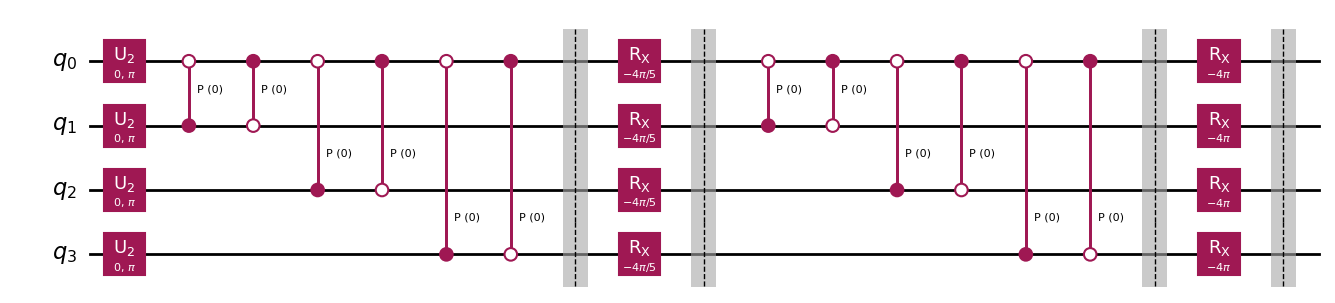

Estado típico:


<IPython.core.display.Latex object>

In [ ]:
'''
QAOA para o MaxCut
'''

'''
Pacotes
'''

import time
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_aer.primitives import Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Statevector

estimator = Estimator()

'''
Algoritmo
'''

inicio = time.time() # t inicial

# PASSO 1: Circuito

n = 4 # número de qubits
qubits = [k for k in range(n)]

# Circuito

qaoa = QuantumCircuit(n)

# Hamiltoniano

HC = SparsePauliOp.from_sparse_list([("I", [0], 3/2),
 ("ZZ", [0,1], -1/2),
  ("ZZ", [0,2], -1/2),
   ("ZZ", [0,3], -1/2)], num_qubits = n)

# PASSO 2: Operador de custo

def uc(g): # operador custo com parâmetro 'g' (gamma)
    qc = QuantumCircuit(n)
    for k in range(1,n):
        qc.cp(-g,0,k, ctrl_state = 0)
        qc.cp(-g,k,0, ctrl_state = 0)
    return qc

# PASSO 3: Operador mixer

def ux(b): # operador mixer com parâmetro 'b' (beta)
    qc = QuantumCircuit(n)
    for k in range(n):
        qc.rx(-2*b,k)
    return qc

# PASSO 4: Truncamento de p e malha de parâmetros gamma e beta

p = 2
m = 5

parametros = [baseint(m+1,k, 2*p)*2*np.pi/m for k in range((m+1)**(2*p))]

# PASSO 5: PUBs

# Lista de operadores

operators = [HC]*len(parametros)

# Lista de circuitos

for k in range(n): # Inicialização do computador quântico
    qaoa.h(k)

circuitos = []
for k in range(len(parametros)):
    qc = qaoa.copy()
    qc.append(uc(parametros[k][0]), qubits)
    qc.barrier()
    qc.append(ux(parametros[k][1]), qubits)
    qc.barrier()
    qc.append(uc(parametros[k][2]), qubits)
    qc.barrier()
    qc.append(ux(parametros[k][3]), qubits)
    qc.barrier()
    circuitos.append(qc)

print(f"Parâmetro p: p = {p}")
print(f"Parâmetro m: m = {m}")
print(f"Número de circuitos: {len(circuitos)}")
print(f"Número de operadores: {len(operators)}")
print(f"Número de parâmetros: {len(parametros)}")
print(f"Circuito típico:")
display(circuitos[(m+1)**p+m].decompose().draw('mpl'))
print(f"Estado típico:")
display(Statevector.from_instruction(circuitos[(m+1)**p+m]).draw('latex'))

In [ ]:
# PASSO 6: Executar o Estimator

# Transpilação

pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
circuitos_transpilados = [pass_manager.run(circuitos[m]) for m in range(2**n)]

observaveis = [HC for m in range(2**n)] # Lista de observáveis (2^n cópias de HC)
observaveis_transpilados = [observavel.apply_layout(circuitos_transpilados[m].layout) for observavel in observaveis]

## Estimator

job = estimator.run(circuits = circuitos_transpilados, observables = observaveis_transpilados) # manda a lista de circuitos e respectivos observáveis para rodar
#job_id = job.job_id()
#print(job_id)

In [ ]:
'''
Pós-processamento
'''

'''
Comparação dos resultados dos circuitos para determinar qual conjunto de
 parâmetros (e correspondentes circuito e estado) determina o custo máximo
 <HC>_max.
'''

# PASSO 7: Extrair dos resultados do estimator a lista ótima de parâmetros 𝛾 e 𝛽
# que maximizam 𝐹𝑝(𝛾,𝛽).


expval = 0
for k in range(len(job.result().values)):
    if job.result().values[k] > expval:
        expval = job.result().values[k]
        parametro_maxcut = k
    else:
        pass
print(f"Custo máximo: max(< HC >) = {expval}.")
print(f"Ponto crítico da rede: parametro_maxcut = {parametro_maxcut} <-> {baseint(m,parametro_maxcut,m)}.")

# PASSO 9: Extrair da lista ótima o estado que resolve o problema MaxCut.

# Estado maxcut, que determina o custo máximo
estado_maxcut = Statevector.from_instruction(circuitos[parametro_maxcut])
print(f"Estado maxcut:")
display(estado_maxcut.draw('latex'))

# Determinação da componente da base computacional
# com maior contribuição no 'estado maxcut'

maxcut = 0.0
for k in range(len(estado_maxcut)):
    if abs(estado_maxcut[k]) > maxcut:
        maxcut = k
    else:
        pass
print(f"Custo máximo: max(< HC >) = {expval}.")
print(f"Estado da base computacional do maxcut = {maxcut}")
print(f"MaxCut: {baseint(2,maxcut,n)}.")

# Impressão do tempo de execução

# fim = time.time() # t final
# duracao = fim - inicio
#print(f"Duração da execução do algoritmo: {duracao/60}")

Custo máximo: max(< HC >) = 2.23046875.
Ponto crítico da rede: parametro_maxcut = 7 <-> [0 0 0 1 2].
Estado maxcut:


<IPython.core.display.Latex object>

Custo máximo: max(< HC >) = 2.23046875.
Estado da base computacional do maxcut = 1
MaxCut: [0 0 0 1].


## MaxCut 2

<img src="https://drive.google.com/uc?export=view&id=1wPvW1r461IP51mHPh84A2AjMc38y1WQF" alt="drawing" width="300"/>

Parâmetros:

*   Número de vértices/qubits: 4;
*   Função custo:
$$
C(z_0,z_1,z_2,z_3) = \frac{1}{2}\sum_{0 \le j < k \le 3}(1 - z_jz_k);
$$
*   Hamiltoniano e operador do custo:
$$
\begin{split}
H_C &= \frac{1}{2}\sum_{0\le j<k\le 3}(I - Z_jZ_k)\\
&= 3I - \frac{1}{2} Z_0Z_1 - \frac{1}{2}Z_0Z_2 - \frac{1}{2}Z_0Z_3 - \frac{1}{2} Z_1Z_2 - \frac{1}{2} Z_1Z_3  - \frac{1}{2} Z_2Z_3  .
\end{split}
$$

In [ ]:
'''
QAOA para o MaxCut
'''

'''
Pacotes
'''
import time
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_aer.primitives import Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Statevector

estimator = Estimator()

'''
Algoritmo
'''

inicio = time.time() # t inicial

# PASSO 1: Circuito

n = 4 # número de qubits
qubits = [k for k in range(n)]

# Circuito

qaoa = QuantumCircuit(n)

# Hamiltoniano

HC = SparsePauliOp.from_sparse_list([("I", [0], 3),
 ("ZZ", [0,1], -1/2),
  ("ZZ", [0,2], -1/2),
   ("ZZ", [0,3], -1/2),
   ("ZZ", [1,2], -1/2),
   ("ZZ", [1,3], -1/2),
   ("ZZ", [2,3], -1/2)
   ], num_qubits = n)

# PASSO 2: Operador de custo

def uc(g): # operador custo com parâmetro 'g' (gamma)
    qc = QuantumCircuit(n)
    for k in range(1,n):
        qc.cp(-g,0,k, ctrl_state = 0)
        qc.cp(-g,k,0, ctrl_state = 0)
    return qc

# PASSO 3: Operador mixer

def ux(b): # operador mixer com parâmetro 'b' (beta)
    qc = QuantumCircuit(n)
    for k in range(n):
        qc.rx(-2*b,k)
    return qc

# PASSO 4: Truncamento de p e malha de parâmetros gamma e beta

p = 2
m = 5

numero_circuitos = (m+1)**(2*p)

parametros = [baseint(m+1,k, 2*p)*2*np.pi/m for k in range(numero_circuitos)]

# PASSO 5: PUBs

# Lista de operadores

operators = [HC]*numero_circuitos

# Lista de circuitos

for k in range(n): # Inicialização do computador quântico
    qaoa.h(k)

circuitos = []
for k in range(numero_circuitos):
    qc = qaoa.copy()
    for j in range(p):
        qc.append(uc(parametros[k][j]), qubits)
        qc.barrier()
        qc.append(ux(parametros[k][j+1]), qubits)
        qc.barrier()
    circuitos.append(qc)

print(f"Parâmetro p: p = {p}")
print(f"Parâmetro m: m = {m}")
print(f"Número de parâmetros: {len(parametros)}")
print(f"Número de operadores: {len(operators)}")
print(f"Número de circuitos: {numero_circuitos}")
print(f"Circuito típico:")
display(circuitos[(m+1)**p+m].decompose().draw('mpl'))
print(f"Estado típico:")
display(Statevector.from_instruction(circuitos[(m+1)**p+m]).draw('latex'))

NameError: name 'baseint' is not defined

In [ ]:
# PASSO 6: Executar o Estimator

# Transpilação

pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
circuitos_transpilados = [pass_manager.run(circuito) for circuito in circuitos]

observaveis = [HC for m in range(len(circuitos))] # Lista de observáveis (2^n cópias de HC)
observaveis_transpilados = [observaveis[m].apply_layout(circuitos_transpilados[m].layout) for m in range(numero_circuitos)]

## Estimator

job = estimator.run(circuits = circuitos_transpilados, observables = observaveis_transpilados) # manda a lista de circuitos e respectivos observáveis para rodar
#job_id = job.job_id()
#print(job_id)

In [ ]:
'''
Pós-processamento
'''

# PASSO 7: Extrair dos resultados do estimator a lista ótima de parâmetros 𝛾 e 𝛽
# que maximizam 𝐹𝑝(𝛾,𝛽).

# Comparação dos resultados dos circuitos
# para determinar qual conjunto de parâmetros
# (e correspondentes circuito e estado)
# determina o custo máximo <HC>_max.

expval_max = 0; parametro_maxcut = 0
for k in range(numero_circuitos):
    expval = job.result().values[k]
    if expval > expval_max:
        expval_max = expval
        parametro_maxcut = k
    else:
        pass
print(f"Custo máximo: max(< HC >) = {expval_max}.")
print(f"Parametro_maxcut = {parametro_maxcut} <-> {parametros[parametro_maxcut]}.")

# PASSO 9: Extrair da lista ótima o estado que resolve o problema MaxCut.

# Estado maxcut, que determina o custo máximo
#display(circuitos[parametro_maxcut].decompose().draw('mpl'))
estado_maxcut = Statevector.from_instruction(circuitos[parametro_maxcut])
print(f"Estado maxcut:")
display(estado_maxcut.draw('latex'))

# Determinação da componente da base computacional
# com maior contribuição no 'estado maxcut'

prob_max = 0.0; estado_maxcut_base = 0
for k in range(len(estado_maxcut)):
    prob = abs(estado_maxcut[k])
    if abs(prob) > prob_max:
        prob_max = prob
        estado_maxcut_base = k
    else:
        pass
print(f"Custo máximo: max(< HC >) = {expval_max}.")
print(f"MaxCut: {baseint(2,estado_maxcut_base,n)}.")

# Impressão do tempo de execução

# fim = time.time() # t final
# duracao = fim - inicio
#print(f"Duração da execução do algoritmo: {duracao/60}")

Custo máximo: max(< HC >) = 3.63671875.
Parametro_maxcut = 20 <-> [0.         0.         3.76991118 2.51327412].
Estado maxcut:


<IPython.core.display.Latex object>

Custo máximo: max(< HC >) = 3.63671875.
MaxCut: [0 0 1 1].


## MaxCut 3

<img src="https://drive.google.com/uc?export=view&id=1FggGUZNWvOU9YVt9D7pHfWRAvZI9qkR2" alt="drawing" width="350"/>

Parâmetros:

*   Número de vértices/qubits: 5;
*   Função custo:
$$
\begin{split}
C(z_0,z_1,z_2,z_3,z_4) &= \frac{1}{2}\left\lbrack (1 - z_0z_1) + (1 - z_0z_4) + (1 - z_1z_2) + (1 - z_1z_4) + (1 - z_2z_3)+ (1 - z_3z_4)\right\rbrack\\
&= 3 - \frac{1}{2}z_0z_1 - \frac{1}{2}z_0z_4 - \frac{1}{2}z_1z_2 - \frac{1}{2}z_1z_4 - \frac{1}{2}z_2z_3 - \frac{1}{2}z_3z_4.
\end{split}
$$
*   Hamiltoniano e operador do custo:
$$
\begin{split}
H_C &= 3I - \frac{1}{2}Z_0Z_1 - \frac{1}{2}Z_0Z_4 - \frac{1}{2}Z_1Z_2 - \frac{1}{2}Z_1Z_4 - \frac{1}{2}Z_2Z_3 - \frac{1}{2}Z_3Z_4.
\end{split}
$$

In [ ]:
'''
Pacotes
'''
import time
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_aer.primitives import Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Statevector

estimator = Estimator()

Circuito maxcut:


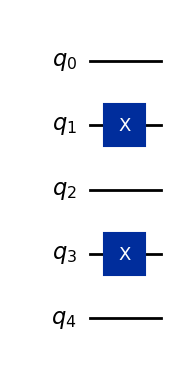

Hamiltoniano de custo:


SparsePauliOp(['IIIII', 'IIIZZ', 'ZIIIZ', 'IIZZI', 'ZIIZI', 'IZZII', 'ZZIII'],
              coeffs=[ 3. +0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j])

Maxcut:


5.0

In [ ]:
'''
TESTE da RESPOSTA

Corte máximo: (1,3) ; (0,2,4)

Custo de corte máximo = 5
'''
n=5
qc = QuantumCircuit(n)

qc.x(1)
qc.x(3)

print("Circuito maxcut:")
display(qc.draw('mpl'))

HC = SparsePauliOp.from_sparse_list([("I", [0], 3),
 ("ZZ", [0,1], -1/2),
  ("ZZ", [0,4], -1/2),
   ("ZZ", [1,2], -1/2),
   ("ZZ", [1,4], -1/2),
   ("ZZ", [2,3], -1/2),
   ("ZZ", [3,4], -1/2)
   ], num_qubits = n)

print("Hamiltoniano de custo:")
display(HC)

circuitos = [qc]

observaveis = [HC]

# Transpilação

pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
circuitos_transpilados = [pass_manager.run(circuito) for circuito in circuitos]

observaveis = [HC for m in range(len(circuitos))] # Lista de observáveis (2^n cópias de HC)
observaveis_transpilados = [observaveis[m].apply_layout(circuitos_transpilados[m].layout) for m in range(1)]

## Estimator

job = estimator.run(circuits = circuitos_transpilados, observables = observaveis_transpilados) # manda a lista de circuitos e respectivos observáveis para rodar

print("Maxcut:")
job.result().values[0]

Parâmetro p: p = 2
Parâmetro m: m = 9
Número de parâmetros: 10000
Número de operadores: 10000
Número de circuitos: 10000
Circuito típico:


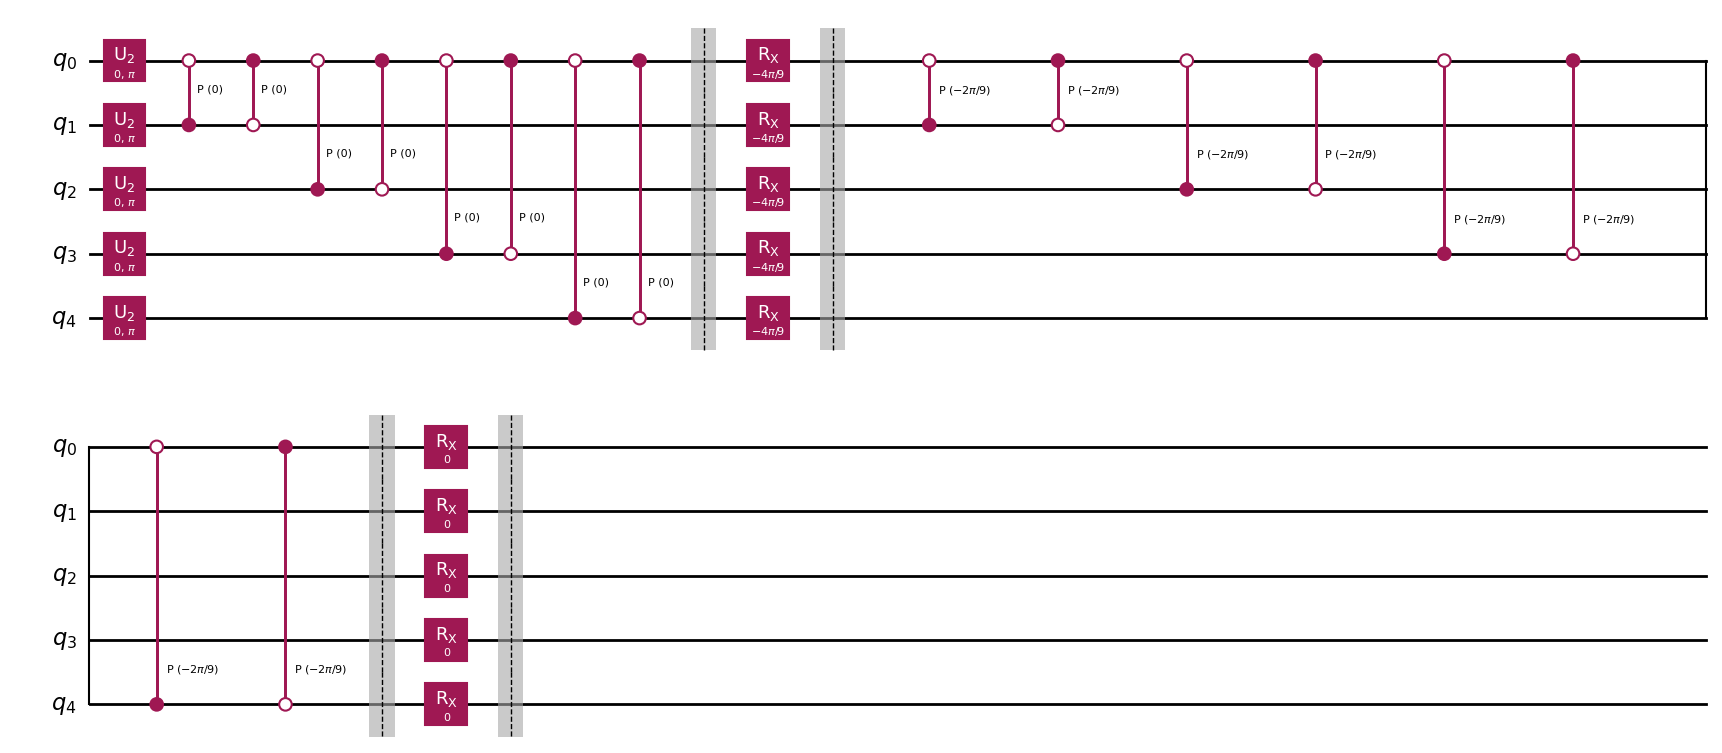

Estado típico:


<IPython.core.display.Latex object>

Custo máximo: max(< HC >) = 3.4990234375.
Parametro_maxcut = 1160 <-> [0.6981317 0.6981317 4.1887902 0.       ].
Estado maxcut:


<IPython.core.display.Latex object>

Custo máximo: max(< HC >) = 3.4990234375.
Estado_maxcut_base = 3
MaxCut: [0 0 0 1 1].
Duração da execução do algoritmo: 26.007489943504332 min.


In [ ]:
'''
QAOA para o MaxCut
'''

inicio = time.time() # t inicial

# PASSO 1: Circuito

n = 5 # número de qubits
qubits = [k for k in range(n)]

# Circuito

qaoa = QuantumCircuit(n)

# Hamiltoniano

HC = SparsePauliOp.from_sparse_list([("I", [0], 3),
 ("ZZ", [0,1], -1/2),
  ("ZZ", [0,4], -1/2),
   ("ZZ", [1,2], -1/2),
   ("ZZ", [1,4], -1/2),
   ("ZZ", [2,3], -1/2),
   ("ZZ", [3,4], -1/2)
   ], num_qubits = n)

# PASSO 2: Operador de custo

def uc(g): # operador custo com parâmetro 'g' (gamma)
    qc = QuantumCircuit(n)
    for k in range(1,n):
        qc.cp(-g,0,k, ctrl_state = 0)
        qc.cp(-g,k,0, ctrl_state = 0)
    return qc

# PASSO 3: Operador mixer

def ux(b): # operador mixer com parâmetro 'b' (beta)
    qc = QuantumCircuit(n)
    for k in range(n):
        qc.rx(-2*b,k)
    return qc

# PASSO 4: Truncamento de p e malha de parâmetros gamma e beta

# >>>> Trava com p = 3 & m = 5
# >>>> Rodou bem com p = 2 & m = 6, mas com resultados eventualmente errados
# >>>> Rodou bem com p = 2 & m = 8
p = 2
m = 9

numero_circuitos = (m+1)**(2*p)

parametros = [baseint(m+1,k, 2*p)*2*np.pi/m for k in range(numero_circuitos)]

# PASSO 5: PUBs

# Lista de operadores

operators = [HC]*numero_circuitos

# Lista de circuitos

for k in range(n): # Inicialização do computador quântico
    qaoa.h(k)

circuitos = []
for k in range(numero_circuitos):
    qc = qaoa.copy()
    for j in range(p):
        qc.append(uc(parametros[k][j]), qubits)
        qc.barrier()
        qc.append(ux(parametros[k][j+1]), qubits)
        qc.barrier()
    circuitos.append(qc)

print(f"Parâmetro p: p = {p}")
print(f"Parâmetro m: m = {m}")
print(f"Número de parâmetros: {len(parametros)}")
print(f"Número de operadores: {len(operators)}")
print(f"Número de circuitos: {numero_circuitos}")
print(f"Circuito típico:")
display(circuitos[(m+1)**p+m].decompose().draw('mpl'))
print(f"Estado típico:")
display(Statevector.from_instruction(circuitos[(m+1)**p+m]).draw('latex'))

# PASSO 6: Executar o Estimator

# Transpilação

pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
circuitos_transpilados = [pass_manager.run(circuito) for circuito in circuitos]

observaveis = [HC for m in range(len(circuitos))] # Lista de observáveis (2^n cópias de HC)
observaveis_transpilados = [observaveis[m].apply_layout(circuitos_transpilados[m].layout) for m in range(numero_circuitos)]

## Estimator

job = estimator.run(circuits = circuitos_transpilados, observables = observaveis_transpilados) # manda a lista de circuitos e respectivos observáveis para rodar

'''
Pós-processamento
'''

# PASSO 7: Extrair dos resultados do estimator a lista ótima de parâmetros 𝛾 e 𝛽
# que maximizam 𝐹𝑝(𝛾,𝛽).

# Comparação dos resultados dos circuitos
# para determinar qual conjunto de parâmetros
# (e correspondentes circuito e estado)
# determina o custo máximo <HC>_max.

expval_max = 0; parametro_maxcut = 0
for k in range(numero_circuitos):
    expval = job.result().values[k]
    if expval > expval_max:
        expval_max = expval
        parametro_maxcut = k
    else:
        pass
print(f"Custo máximo: max(< HC >) = {expval_max}.")
print(f"Parametro_maxcut = {parametro_maxcut} <-> {parametros[parametro_maxcut]}.")

# PASSO 9: Extrair da lista ótima o estado que resolve o problema MaxCut.

# Estado maxcut, que determina o custo máximo
#display(circuitos[parametro_maxcut].decompose().draw('mpl'))
estado_maxcut = Statevector.from_instruction(circuitos[parametro_maxcut])
print(f"Estado maxcut:")
display(estado_maxcut.draw('latex'))

# Determinação da componente da base computacional
# com maior contribuição no 'estado maxcut'

prob_max = 0.0; estado_maxcut_base = 0
for k in range(len(estado_maxcut)):
    prob = abs(estado_maxcut[k])
    if abs(prob) > prob_max:
        prob_max = prob
        estado_maxcut_base = k
    else:
        pass
print(f"Custo máximo: max(< HC >) = {expval_max}.")
print(f"Estado_maxcut_base = {estado_maxcut_base}")
print(f"MaxCut: {baseint(2,estado_maxcut_base,n)}.")

# Impressão do tempo de execução

fim = time.time() # t final
duracao = fim - inicio
print(f"Duração da execução do algoritmo: {duracao/60} min.")

## MaxCut 4

<img src="https://drive.google.com/uc?export=view&id=1ndw-ZdUPrry07p-mxalfiP6VaG9guVfw" alt="drawing" width="350"/>

Parâmetros:

*   Número de vértices/qubits: 5;
*   Função custo:
$$
\begin{split}
C(z_0,z_1,z_2,z_3,z_4) &=  \frac{1}{2} \sum_{0 \le j < k \le 5} (1 - z_jz_k) \\
&= \frac{1}{2}\left\lbrack (1 - z_0z_1) + (1 - z_0z_2) + (1 - z_0z_3) + (1 - z_0z_4) + (1 - z_1z_2) +  (1 - z_1z_3) + (1 - z_1z_4) + (1 - z_2z_3) + (1 - z_2z_4) + (1 - z_3z_4)\right\rbrack\\
&= 5 - \frac{1}{2}z_0z_1 - \frac{1}{2}z_0z_3 - \frac{1}{2}z_0z_3 - \frac{1}{2}z_0z_4 - \frac{1}{2}z_1z_2 - \frac{1}{2}z_1z_3 - \frac{1}{2}z_1z_4 - \frac{1}{2}z_2z_3 - \frac{1}{2}z_2z_4 - \frac{1}{2}z_3z_4.
\end{split}
$$
*   Hamiltoniano e operador do custo:
$$
\begin{split}
H_C &= 5I - \frac{1}{2}Z_0Z_1 - \frac{1}{2}Z_0Z_2 - \frac{1}{2}Z_0Z_3 - \frac{1}{2}Z_0Z_4 - \frac{1}{2}Z_1Z_2 - \frac{1}{2}Z_1Z_3 - \frac{1}{2}Z_1Z_4 - \frac{1}{2}Z_2Z_3 - \frac{1}{2}Z_2Z_4 - \frac{1}{2}Z_3Z_4.
\end{split}
$$

In [ ]:
'''
Pacotes
'''
import time
import numpy as np
from qiskit.circuit import Parameter
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit_aer.primitives import Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Statevector

estimator = Estimator()

Circuito maxcut:


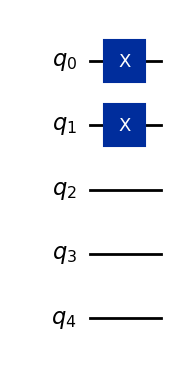

Hamiltoniano de custo:


SparsePauliOp(['IIIII', 'IIIZZ', 'IIZIZ', 'IZIIZ', 'ZIIIZ', 'IIZZI', 'IZIZI', 'ZIIZI', 'IZZII', 'ZIZII', 'ZZIII'],
              coeffs=[ 5. +0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j,
 -0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j])

Maxcut:


6.0

In [ ]:
'''
TESTE da RESPOSTA

Corte máximo: (1,3) ; (0,2,4)

Custo de corte máximo = 5
'''
n=5
qc = QuantumCircuit(n)

qc.x(0)
qc.x(1)

print("Circuito maxcut:")
display(qc.draw('mpl'))

HC = SparsePauliOp.from_sparse_list([("I", [0], 5),
 ("ZZ", [0,1], -1/2),
  ("ZZ", [0,2], -1/2),
    ("ZZ", [0,3], -1/2),
  ("ZZ", [0,4], -1/2),
   ("ZZ", [1,2], -1/2),
    ("ZZ", [1,3], -1/2),
   ("ZZ", [1,4], -1/2),
   ("ZZ", [2,3], -1/2),
    ("ZZ", [2,4], -1/2),
   ("ZZ", [3,4], -1/2)
   ], num_qubits = n)

print("Hamiltoniano de custo:")
display(HC)

circuitos = [qc]

observaveis = [HC]

# Transpilação

pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
circuitos_transpilados = [pass_manager.run(circuito) for circuito in circuitos]

observaveis = [HC for m in range(len(circuitos))] # Lista de observáveis (2^n cópias de HC)
observaveis_transpilados = [observaveis[m].apply_layout(circuitos_transpilados[m].layout) for m in range(1)]

## Estimator

job = estimator.run(circuits = circuitos_transpilados, observables = observaveis_transpilados) # manda a lista de circuitos e respectivos observáveis para rodar

print("Maxcut:")
job.result().values[0]

Parâmetro p: p = 2
Parâmetro m: m = 10
Número de parâmetros: 14641
Número de operadores: 14641
Número de circuitos: 14641
Circuito típico:


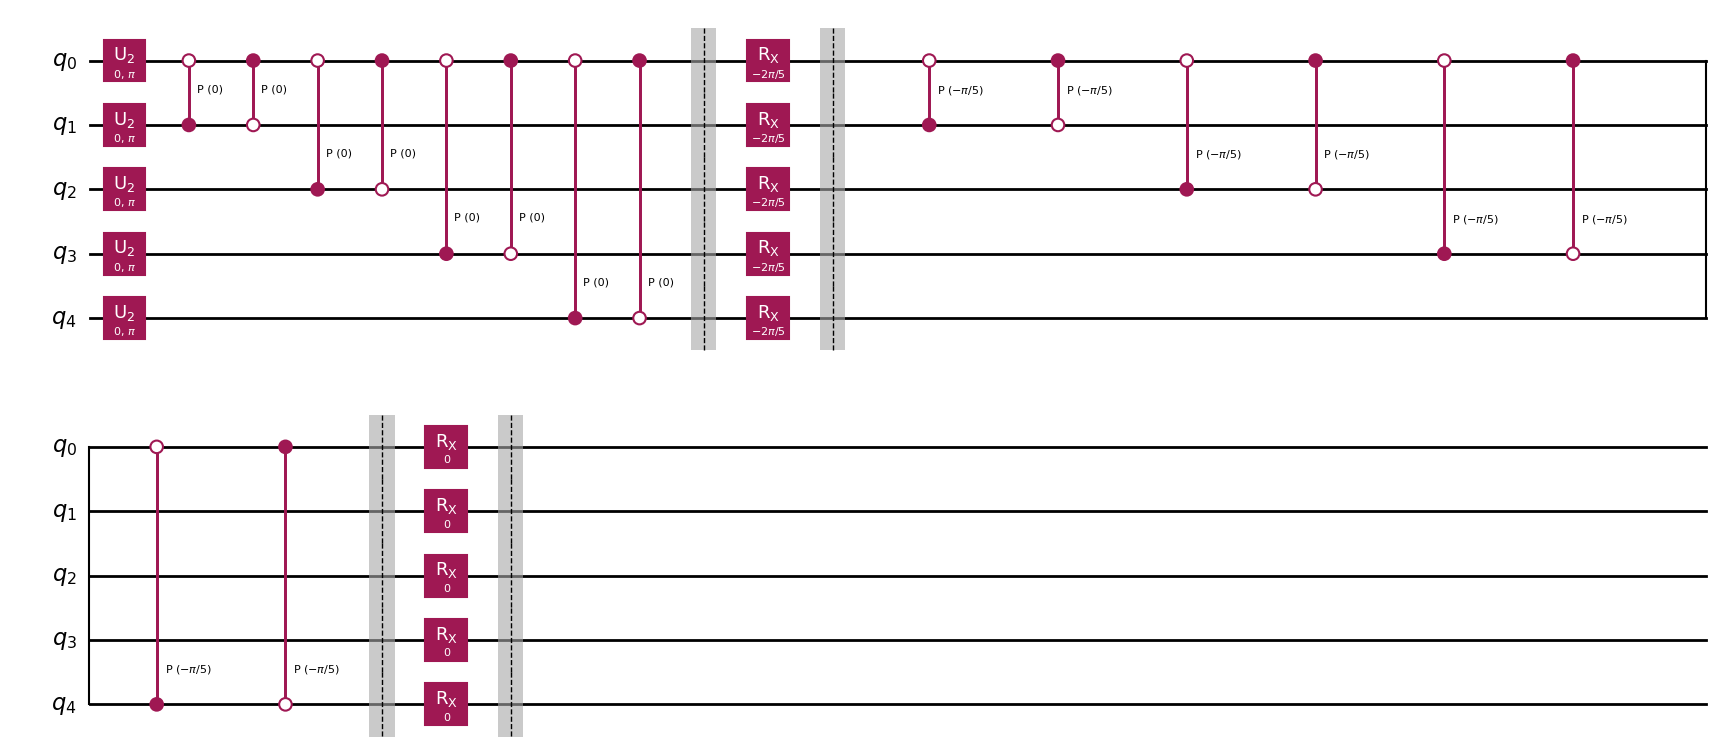

Estado típico:


<IPython.core.display.Latex object>

Custo máximo: max(< HC >) = 5.845703125.
Parametro_maxcut = 4255 <-> [1.88495559 1.25663706 0.62831853 5.65486678].
Estado maxcut:


<IPython.core.display.Latex object>

Custo máximo: max(< HC >) = 5.845703125.
Estado_maxcut_base = 3
MaxCut: [0 0 0 1 1].
Duração da execução do algoritmo: 23.216942807038624 min.


In [ ]:
'''
QAOA para o MaxCut
'''

inicio = time.time() # t inicial

# PASSO 1: Circuito

n = 5 # número de qubits
qubits = [k for k in range(n)]

# Circuito

qaoa = QuantumCircuit(n)

# Hamiltoniano

HC = SparsePauliOp.from_sparse_list([("I", [0], 5),
 ("ZZ", [0,1], -1/2),
  ("ZZ", [0,2], -1/2),
    ("ZZ", [0,3], -1/2),
  ("ZZ", [0,4], -1/2),
   ("ZZ", [1,2], -1/2),
    ("ZZ", [1,3], -1/2),
   ("ZZ", [1,4], -1/2),
   ("ZZ", [2,3], -1/2),
    ("ZZ", [2,4], -1/2),
   ("ZZ", [3,4], -1/2)
   ], num_qubits = n)

# PASSO 2: Operador de custo

def uc(g): # operador custo com parâmetro 'g' (gamma)
    qc = QuantumCircuit(n)
    for k in range(1,n):
        qc.cp(-g,0,k, ctrl_state = 0)
        qc.cp(-g,k,0, ctrl_state = 0)
    return qc

# PASSO 3: Operador mixer

def ux(b): # operador mixer com parâmetro 'b' (beta)
    qc = QuantumCircuit(n)
    for k in range(n):
        qc.rx(-2*b,k)
    return qc

# PASSO 4: Truncamento de p e malha de parâmetros gamma e beta

# >>>> Roda com p = 1 & m = 20: resposta errada!
# >>>> Roda com p = 1 & m = 30 (em < 2.47 min): resposta errada!
# >>>> Roda com p = 1 & m = 40 (em < 4.46 min): resposta errada!
# >>>> Roda com p = 1 & m = 50 (em < 7.00 min): resposta errada!
# >>>> Roda com p = 1 & m = 99 (em = 28.59 min): resposta errada!
# >>>> Roda com p = 2 & m = 10 (em = 23.21694 min): resposta CERTA!
p = 2
m = 10

numero_circuitos = (m+1)**(2*p)

parametros = [baseint(m+1,k, 2*p)*2*np.pi/m for k in range(numero_circuitos)]

# PASSO 5: PUBs

# Lista de operadores

operators = [HC]*numero_circuitos

# Lista de circuitos

for k in range(n): # Inicialização do computador quântico
    qaoa.h(k)

circuitos = []
for k in range(numero_circuitos):
    qc = qaoa.copy()
    for j in range(p):
        qc.append(uc(parametros[k][j]), qubits)
        qc.barrier()
        qc.append(ux(parametros[k][j+1]), qubits)
        qc.barrier()
    circuitos.append(qc)

print(f"Parâmetro p: p = {p}")
print(f"Parâmetro m: m = {m}")
print(f"Número de parâmetros: {len(parametros)}")
print(f"Número de operadores: {len(operators)}")
print(f"Número de circuitos: {numero_circuitos}")
print(f"Circuito típico:")
display(circuitos[(m+1)**p+m].decompose().draw('mpl'))
print(f"Estado típico:")
display(Statevector.from_instruction(circuitos[(m+1)**p+m]).draw('latex'))

# PASSO 6: Executar o Estimator

# Transpilação

pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
circuitos_transpilados = [pass_manager.run(circuito) for circuito in circuitos]

observaveis = [HC for m in range(len(circuitos))] # Lista de observáveis (2^n cópias de HC)
observaveis_transpilados = [observaveis[m].apply_layout(circuitos_transpilados[m].layout) for m in range(numero_circuitos)]

## Estimator

job = estimator.run(circuits = circuitos_transpilados, observables = observaveis_transpilados) # manda a lista de circuitos e respectivos observáveis para rodar

'''
Pós-processamento
'''

# PASSO 7: Extrair dos resultados do estimator a lista ótima de parâmetros 𝛾 e 𝛽
# que maximizam 𝐹𝑝(𝛾,𝛽).

# Comparação dos resultados dos circuitos
# para determinar qual conjunto de parâmetros
# (e correspondentes circuito e estado)
# determina o custo máximo <HC>_max.

expval_max = 0; parametro_maxcut = 0
for k in range(numero_circuitos):
    expval = job.result().values[k]
    if expval > expval_max:
        expval_max = expval
        parametro_maxcut = k
    else:
        pass
print(f"Custo máximo: max(< HC >) = {expval_max}.")
print(f"Parametro_maxcut = {parametro_maxcut} <-> {parametros[parametro_maxcut]}.")

# PASSO 9: Extrair da lista ótima o estado que resolve o problema MaxCut.

# Estado maxcut, que determina o custo máximo
#display(circuitos[parametro_maxcut].decompose().draw('mpl'))
estado_maxcut = Statevector.from_instruction(circuitos[parametro_maxcut])
print(f"Estado maxcut:")
display(estado_maxcut.draw('latex'))

# Determinação da componente da base computacional
# com maior contribuição no 'estado maxcut'

prob_max = 0.0; estado_maxcut_base = 0
for k in range(len(estado_maxcut)):
    prob = abs(estado_maxcut[k])
    if abs(prob) > prob_max:
        prob_max = prob
        estado_maxcut_base = k
    else:
        pass
print(f"Custo máximo: max(< HC >) = {expval_max}.")
print(f"Estado_maxcut_base = {estado_maxcut_base}")
print(f"MaxCut: {baseint(2,estado_maxcut_base,n)}.")

# Impressão do tempo de execução

fim = time.time() # t final
duracao = fim - inicio
print(f"Duração da execução do algoritmo: {duracao/60} min.")

### TESTES

# QAOA com Método do Gradiente

## Gradiente de **$F_p(\gamma, \beta)$**

Do Cálculo, sabemos que o gradiente de uma função diferenciável define a direção e sentido de seu crescimento máximo:

$$
F(p + \varepsilon \vec{\nabla}F(p)) > F(p),\ \text{se}\ \vec{\nabla}F(p) \neq \vec{0}\ \text{e}\ \varepsilon >0\ \text{suficientemente pequeno}.
$$

No método QAOA, buscamos maximizar a função
$$
F_p(\mathbf{\gamma},\mathbf{\beta}) = \langle \mathbf{\gamma}, \mathbf{\beta} ; p | H_C | \mathbf{\gamma}, \mathbf{\beta} ; p \rangle.
$$

O gradiente dessa função pode ser expresso da seguinte forma

$$
\begin{split}
\nabla_{\gamma, \beta} F(\gamma,\beta) &= \sum_{\gamma_\ell = 0}^p \left\lbrack \frac{\partial}{\partial \gamma_\ell} F(\gamma,\beta)\hat{\gamma}_\ell + \frac{\partial}{\partial \beta_\ell} F(\gamma,\beta)\hat{\beta}_\ell \right\rbrack.
\end{split}
$$
onde $\hat{\gamma}_\ell$ e $\hat{\beta}_\ell$ são versores nas direções das respectivas variáveis e as derivadas parciais possuem a seguinte expressão:

$$
\begin{split}
\frac{\partial}{\partial \gamma_\ell} F(\gamma,\beta) &= \frac{\partial}{\partial \gamma_\ell}  \langle \mathbf{\gamma}, \mathbf{\beta} | H_C | \mathbf{\gamma}, \mathbf{\beta}  \rangle\\
&= \left(\frac{\partial}{\partial \gamma_\ell}|\mathbf{\gamma}, \mathbf{\beta}  \rangle\right)^\dagger H_C | \mathbf{\gamma}, \mathbf{\beta}  \rangle + \langle \mathbf{\gamma}, \mathbf{\beta} | H_C \left( \frac{\partial}{\partial \gamma_\ell}| \mathbf{\gamma}, \mathbf{\beta}  \rangle \right).
\end{split}
$$

Essas derivadas parciais têm expressões analíticas complicadas e dependentes do modelo (*viz.*, $H_C$) e também do parâmetro $p$, o que torna difícil empregá-las. Entretanto, podemos apelar para uma aproximação numérica razoável:

$$
\frac{\partial}{\partial \gamma_\ell} F_p(\gamma, \beta) \approx \frac{F_p(\gamma + h \hat{\gamma}_\ell, \beta) - F_p(\gamma - h \hat{\gamma}_\ell, \beta)}{2h}
$$
e
$$
\frac{\partial}{\partial \beta_\ell} F_p(\gamma, \beta) \approx \frac{F_p(\gamma, \beta + h \hat{\beta}_\ell) - F_p(\gamma, \beta - h \hat{\beta}_\ell)}{2h}.
$$
Dessa forma, partindo de um ponto $(\gamma^0, \beta^0)$, em tese podemos aproximar um ponto de máximo local de $F_p(\gamma, \beta)$ pela seguinte iteração definida para $h,\varepsilon >0$ suficientemente pequenos:

$$
\gamma^{k+1}_\ell \leftarrow \gamma^k_\ell + \varepsilon \frac{F_p(\gamma + h \hat{\gamma}_\ell, \beta) - F_p(\gamma - h \hat{\gamma}_\ell, \beta)}{2h};\ k = 0, 1, \dots
$$

Observamos que é necessário calcular $F_p(\gamma, \beta)$ duas vezes em cada iteração (para dois pares de valores distintos de $\gamma$ e $\beta$), requerendo a construção e medida de dois circuitos.


## QAOA Gradiente: MaxCut 3

<img src="https://drive.google.com/uc?export=view&id=1FggGUZNWvOU9YVt9D7pHfWRAvZI9qkR2" alt="drawing" width="350"/>

Parâmetros:

*   Número de vértices/qubits: 5;
*   Função custo:
$$
\begin{split}
C(z_0,z_1,z_2,z_3,z_4) &= \frac{1}{2}\left\lbrack (1 - z_0z_1) + (1 - z_0z_4) + (1 - z_1z_2) + (1 - z_1z_4) + (1 - z_2z_3)+ (1 - z_3z_4)\right\rbrack\\
&= 3 - \frac{1}{2}z_0z_1 - \frac{1}{2}z_0z_4 - \frac{1}{2}z_1z_2 - \frac{1}{2}z_1z_4 - \frac{1}{2}z_2z_3 - \frac{1}{2}z_3z_4.
\end{split}
$$
*   Hamiltoniano e operador do custo:
$$
\begin{split}
H_C &= 3I - \frac{1}{2}Z_0Z_1 - \frac{1}{2}Z_0Z_4 - \frac{1}{2}Z_1Z_2 - \frac{1}{2}Z_1Z_4 - \frac{1}{2}Z_2Z_3 - \frac{1}{2}Z_3Z_4.
\end{split}
$$

In [ ]:
'''
QAOA para o MaxCut
'''

'''
Pacotes
'''
import time
import numpy as np
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

estimator = Estimator()

In [ ]:
'''
Algoritmo
'''

inicio = time.time()  # Tempo inicial

n = 5  # Número de qubits

# PASSO 1: Hamiltoniano e operadores de custo e mixer

HC = SparsePauliOp.from_sparse_list([
    ("I", [0], 3),
    ("ZZ", [0, 1], -1/2),
    ("ZZ", [0, 4], -1/2),
    ("ZZ", [1, 2], -1/2),
    ("ZZ", [1, 4], -1/2),
    ("ZZ", [2, 3], -1/2),
    ("ZZ", [3, 4], -1/2)
], num_qubits=n)

def uc(n, g):  # Operador custo com parâmetro 'g' (gamma)
    qc = QuantumCircuit(n, name="UC")
    for k in range(1, n):
        qc.cp(-g, 0, k, ctrl_state=0)
        qc.cp(-g, k, 0, ctrl_state=0)
    return qc

def ux(n, b):  # Operador mixer com parâmetro 'b' (beta)
    qc = QuantumCircuit(n, name="UX")
    for k in range(n):
        qc.rx(-2*b, k)
    return qc

# PASSO 2: Truncamento de p e família de parâmetros gamma e beta

p = 3  # Número de camadas

parametros = [Parameter(f"gb_{k}") for k in range(2 * p)]

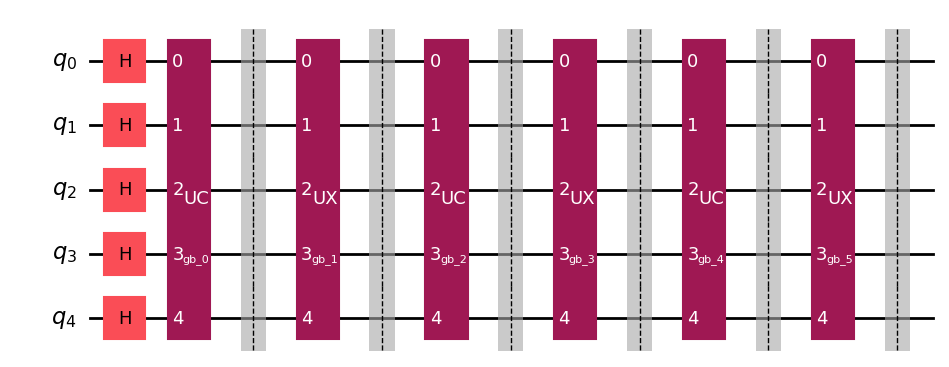

In [ ]:
# PASSO 3: Circuito

qaoa = QuantumCircuit(n)
qubits = list(range(n))

for k in range(n):  # Inicialização do computador quântico
    qaoa.h(k)

for k in range(p):
    qaoa.append(uc(n, parametros[2 * k]), qubits)
    qaoa.barrier()
    qaoa.append(ux(n, parametros[2 * k + 1]), qubits)
    qaoa.barrier()

qaoa.draw('mpl')


In [ ]:
# PASSO 4: LOOP

epsilon = 0.001  # Passo do gradiente
h = 0.001  # Passo do circuito

# Inicialização dos parâmetros gamma e beta
parametros_iniciais = [0.0 for _ in range(2 * p)]
parametros_valores = parametros_iniciais.copy()
expval_antigo = None  # Para armazenar o valor esperado anterior
delta = 1e-6  # Critério de parada baseado na variação da energia
iteracoes_max = 100  # Número máximo de iterações

pass_manager = generate_preset_pass_manager(optimization_level=1)

for k in range(iteracoes_max):

    # Montagem dos circuitos
    circuitos_plus = []
    circuitos_minus = []

    for j in range(2 * p):
        parametros_valores_plus = parametros_valores.copy()
        parametros_valores_plus[j] += h
        parametros_valores_minus = parametros_valores.copy()
        parametros_valores_minus[j] -= h

        parametros_plus = {parametros[i]: parametros_valores_plus[i] for i in range(2 * p)}
        parametros_minus = {parametros[i]: parametros_valores_minus[i] for i in range(2 * p)}

        qc_plus = qaoa.copy()
        qc_plus = qc_plus.assign_parameters(parametros_plus)
        qc_plus_transpilado = pass_manager.run(qc_plus)

        qc_minus = qaoa.copy()
        qc_minus = qc_minus.assign_parameters(parametros_minus)
        qc_minus_transpilado = pass_manager.run(qc_minus)

        circuitos_plus.append(qc_plus_transpilado)
        circuitos_minus.append(qc_minus_transpilado)

    # Execução dos circuitos
    job = estimator.run(
        circuits=circuitos_plus + circuitos_minus,
        observables=[HC] * len(circuitos_plus + circuitos_minus)
    )

    expval_values = job.result().values
    midpoint = len(expval_values) // 2
    expval_plus = expval_values[:midpoint]
    expval_minus = expval_values[midpoint:]

    expval_novo = np.mean(expval_plus + expval_minus)  # Média das expectativas

    # Critério de parada
    if expval_antigo is not None and abs(expval_novo - expval_antigo) < delta:
        print(f"Parando na iteração {k} por convergência.")
        break

    expval_antigo = expval_novo  # Atualiza para a próxima iteração

    # Atualiza parâmetros usando gradiente
    for j in range(p):
        gradiente = (expval_plus[j] - expval_minus[j]) / (2 * h)
        parametros_valores[2 * j] += epsilon * gradiente  # Atualiza γ
        parametros_valores[2 * j + 1] += epsilon * gradiente  # Atualiza β

print("Parâmetros finais:", parametros_valores)


# LIXO

In [ ]:
# PASSO 6: Executar o Estimator

# Transpilação

pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
circuitos_transpilados = [pass_manager.run(circuito) for circuito in circuitos]

observaveis = [HC for m in range(len(circuitos))] # Lista de observáveis (2^n cópias de HC)
observaveis_transpilados = [observaveis[m].apply_layout(circuitos_transpilados[m].layout) for m in range(numero_circuitos)]

## Estimator

job = estimator.run(circuits = circuitos_transpilados, observables = observaveis_transpilados) # manda a lista de circuitos e respectivos observáveis para rodar

'''
Pós-processamento
'''

# PASSO 7: Extrair dos resultados do estimator a lista ótima de parâmetros 𝛾 e 𝛽
# que maximizam 𝐹𝑝(𝛾,𝛽).

# Comparação dos resultados dos circuitos
# para determinar qual conjunto de parâmetros
# (e correspondentes circuito e estado)
# determina o custo máximo <HC>_max.

expval_max = 0; parametro_maxcut = 0
for k in range(numero_circuitos):
    expval = job.result().values[k]
    if expval > expval_max:
        expval_max = expval
        parametro_maxcut = k
    else:
        pass
print(f"Custo máximo: max(< HC >) = {expval_max}.")
print(f"Parametro_maxcut = {parametro_maxcut} <-> {parametros[parametro_maxcut]}.")

# PASSO 9: Extrair da lista ótima o estado que resolve o problema MaxCut.

# Estado maxcut, que determina o custo máximo
#display(circuitos[parametro_maxcut].decompose().draw('mpl'))
estado_maxcut = Statevector.from_instruction(circuitos[parametro_maxcut])
print(f"Estado maxcut:")
display(estado_maxcut.draw('latex'))

# Determinação da componente da base computacional
# com maior contribuição no 'estado maxcut'

prob_max = 0.0; estado_maxcut_base = 0
for k in range(len(estado_maxcut)):
    prob = abs(estado_maxcut[k])
    if abs(prob) > prob_max:
        prob_max = prob
        estado_maxcut_base = k
    else:
        pass
print(f"Custo máximo: max(< HC >) = {expval_max}.")
print(f"Estado_maxcut_base = {estado_maxcut_base}")
print(f"MaxCut: {baseint(2,estado_maxcut_base,n)}.")

# Impressão do tempo de execução

fim = time.time() # t final
duracao = fim - inicio
print(f"Duração da execução do algoritmo: {duracao/60} min.")